<a href="https://colab.research.google.com/github/Kunaldahiya2907/Kunal-Dahiya-25pgdm0034/blob/main/Quiz_Orders_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load dataset
file_path = "/content/ORDERS.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert categorical variables (SHIPMODE) into dummy variables
df_encoded = pd.get_dummies(df, columns=['SHIPMODE'], drop_first=True)

# Select relevant features
features = ['DISCOUNT', 'ORDERQUANTITY'] + [col for col in df_encoded.columns if 'SHIPMODE_' in col]
target = 'SALES'

# Define independent (X) and dependent (y) variables
X = df_encoded[features]
y = df_encoded[target]


In [3]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [5]:
# Calculate Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 6972292.52
R² Score: 0.2535


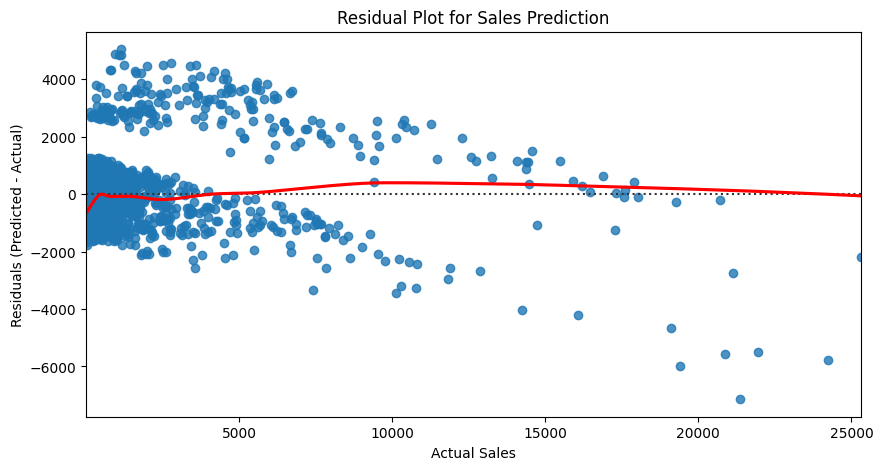

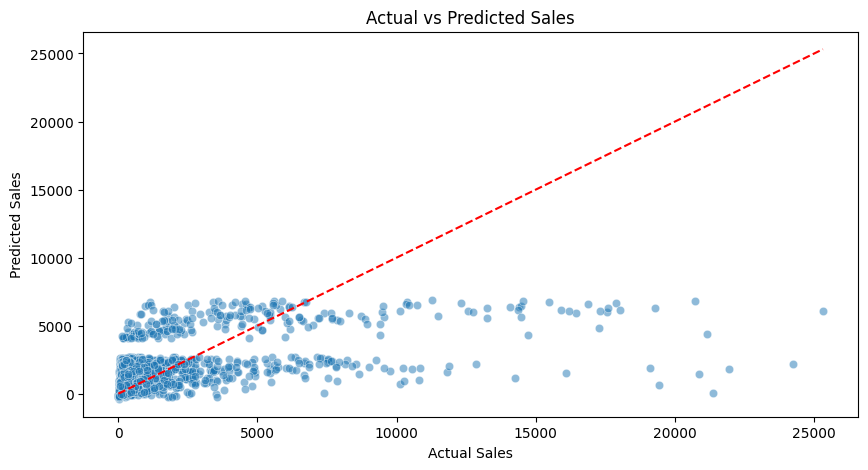

In [6]:
# Residual Plot
plt.figure(figsize=(10,5))
sns.residplot(x=y_test, y=y_pred - y_test, lowess=True, line_kws={"color": "red"})
plt.xlabel("Actual Sales")
plt.ylabel("Residuals (Predicted - Actual)")
plt.title("Residual Plot for Sales Prediction")
plt.show()

# Actual vs. Predicted Sales Plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


<ipython-input-7-c08741e1468a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette="viridis")


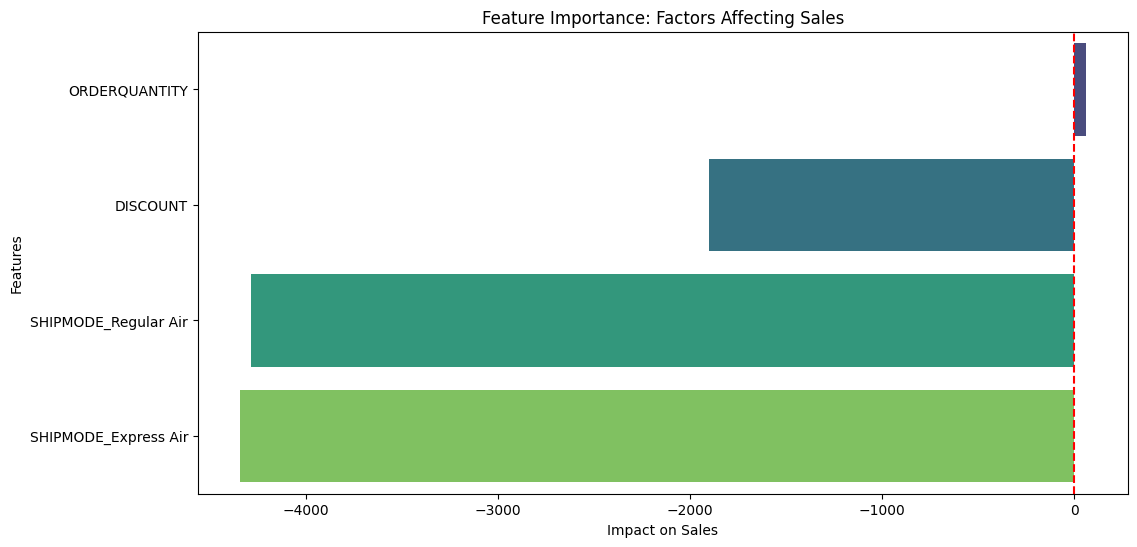

In [7]:
import numpy as np

# Extract feature importance (coefficients from Linear Regression)
coefficients = model.coef_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette="viridis")
plt.axvline(x=0, color='red', linestyle='--')  # Red line at zero
plt.xlabel("Impact on Sales")
plt.ylabel("Features")
plt.title("Feature Importance: Factors Affecting Sales")
plt.show()


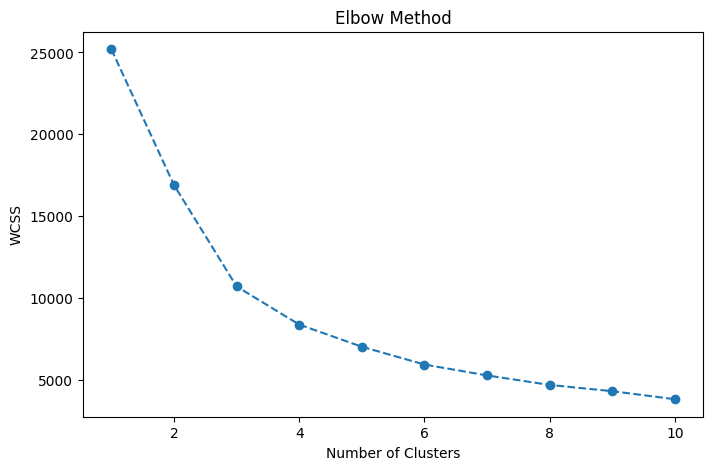

Silhouette Score for K-Means: 0.4652


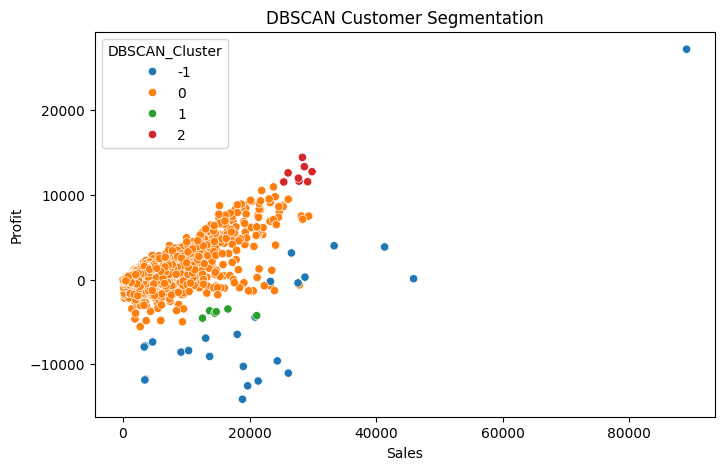

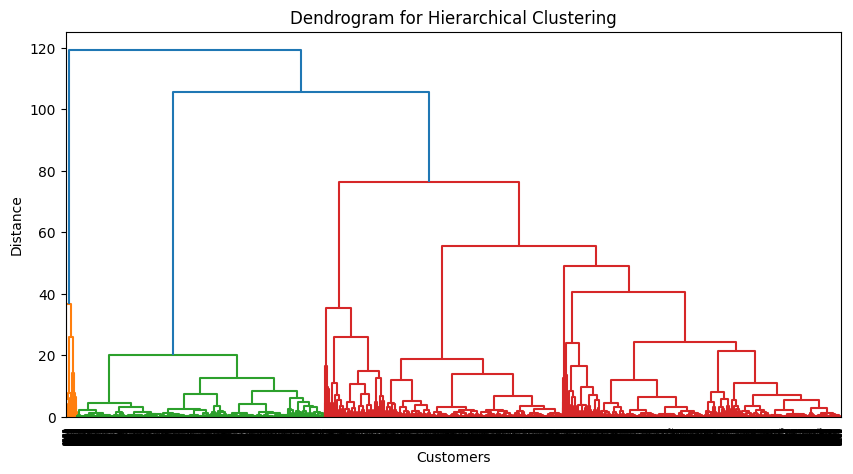

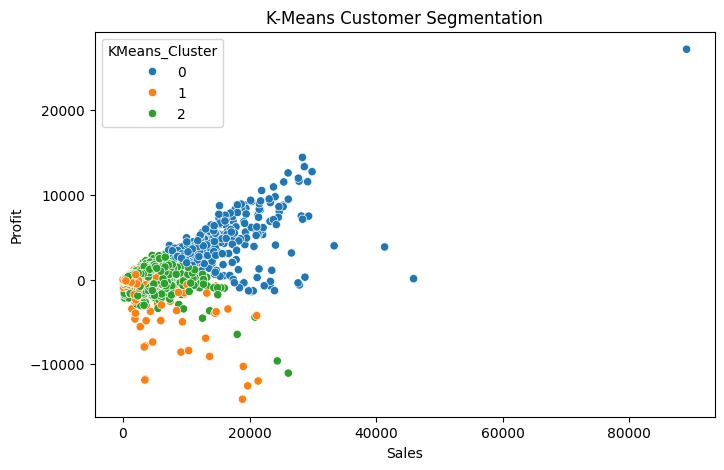

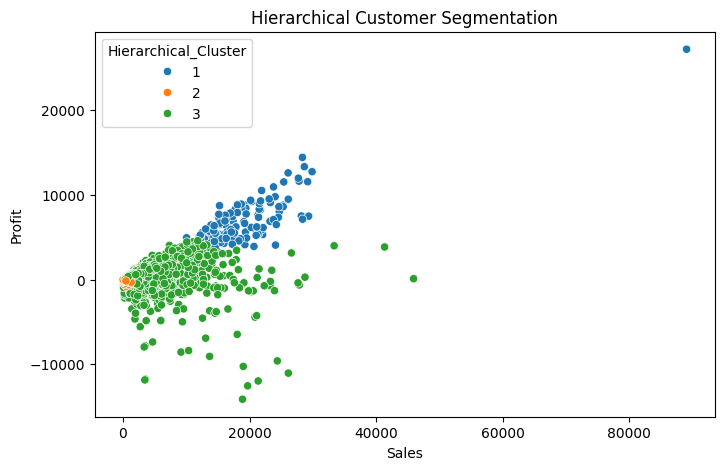

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Load dataset
file_path = "/content/ORDERS.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Select relevant features for clustering
clustering_data = df[['SALES', 'PROFIT', 'ORDERQUANTITY']].copy()
clustering_data = clustering_data.dropna()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# K-Means Clustering - Find Optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Train K-Means with optimal clusters (adjust based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(scaled_data, df['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['SALES'], y=df['PROFIT'], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("DBSCAN Customer Segmentation")
plt.show()

# Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualizing Customer Segments
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['SALES'], y=df['PROFIT'], hue=df['KMeans_Cluster'], palette='tab10')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("K-Means Customer Segmentation")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['SALES'], y=df['PROFIT'], hue=df['Hierarchical_Cluster'], palette='tab10')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Hierarchical Customer Segmentation")
plt.show()


In [11]:
!pip install lifetimes --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00


          CUSTOMERNAME  CLV_Predictive
198        Darren Budd   404690.570339
659         Roy Skaria   351432.172616
247         Ed Braxton   330477.727455
732    Sylvia Foulston   323108.022803
309      Grant Carroll   318002.652383
496       Mark Cousins   292240.646541
218  Deborah Brumfield   269307.282684
392         John Lucas   249868.830294
345      Jack O'Briant   243977.041379
261         Emily Phan   236472.160731


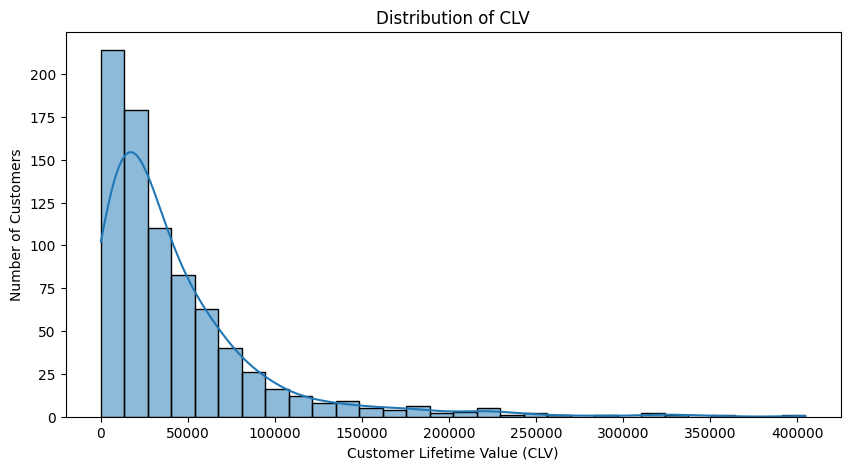

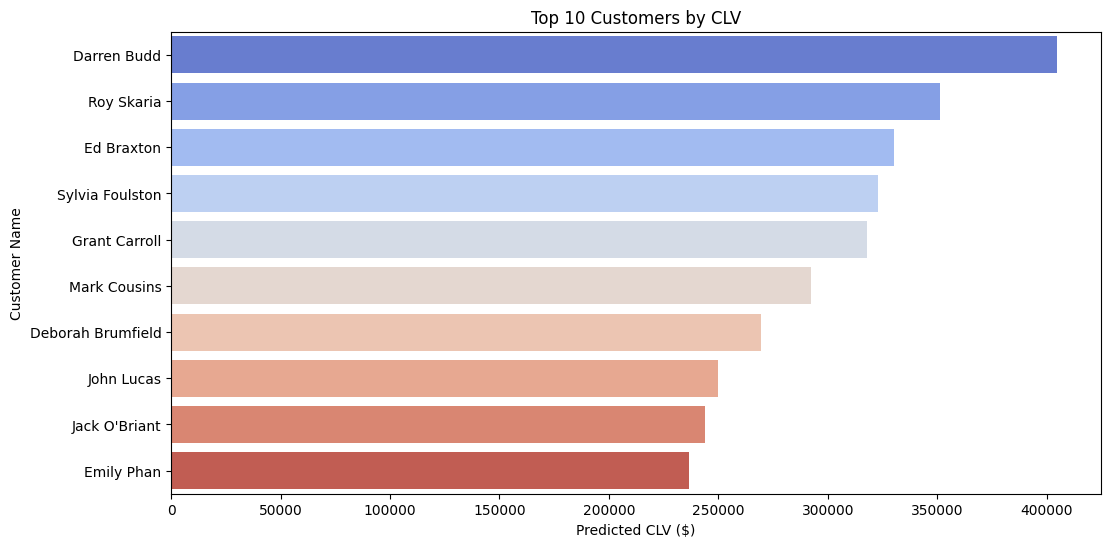

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from lifetimes import BetaGeoFitter, GammaGammaFitter

# Load dataset
file_path = "/content/ORDERS.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert ORDERDATE to datetime format correctly
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%y', errors='coerce')

# Aggregate data at the Customer Level
customer_data = df.groupby('CUSTOMERNAME').agg({
    'ORDERID': 'nunique',  # Frequency: Number of unique purchases
    'SALES': 'sum',  # Monetary Value: Total revenue generated
    'ORDERDATE': ['min', 'max']  # Recency: Last purchase date
}).reset_index()

# Rename columns for clarity
customer_data.columns = ['CUSTOMERNAME', 'Frequency', 'MonetaryValue', 'MinPurchaseDate', 'MaxPurchaseDate']

# Define the last order date in the dataset as "Today"
current_date = df['ORDERDATE'].max()

# Calculate Recency (in days) -> Time between first and last purchase
customer_data['Recency'] = (customer_data['MaxPurchaseDate'] - customer_data['MinPurchaseDate']).dt.days

# Calculate Customer's Age (T) -> Time between first purchase and current date
customer_data['T'] = (current_date - customer_data['MinPurchaseDate']).dt.days

# Ensure Recency does not exceed T
customer_data['Recency'] = customer_data[['Recency', 'T']].min(axis=1)

# Prepare data for lifetimes package
customer_lifetime = customer_data[['CUSTOMERNAME', 'Frequency', 'Recency', 'T', 'MonetaryValue']]

# Fit BG/NBD Model (Predict Purchase Frequency)
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(customer_lifetime['Frequency'], customer_lifetime['Recency'], customer_lifetime['T'])

customer_lifetime['PredictedPurchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(
    180, customer_lifetime['Frequency'], customer_lifetime['Recency'], customer_lifetime['T']
)

# Fit Gamma-Gamma Model (Predict Revenue Per Purchase)
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(customer_lifetime['Frequency'], customer_lifetime['MonetaryValue'])

# ✅ FIXED: Include 'monetary_value' in the function call
customer_lifetime['CLV_Predictive'] = ggf.customer_lifetime_value(
    bgf, customer_lifetime['Frequency'], customer_lifetime['Recency'],
    customer_lifetime['T'], customer_lifetime['MonetaryValue'], time=12, freq='D', discount_rate=0.01
)

# Display top customers by CLV
print(customer_lifetime[['CUSTOMERNAME', 'CLV_Predictive']].sort_values(by='CLV_Predictive', ascending=False).head(10))

# Visualizing CLV Distribution
plt.figure(figsize=(10,5))
sns.histplot(customer_lifetime['CLV_Predictive'], bins=30, kde=True)
plt.xlabel("Customer Lifetime Value (CLV)")
plt.ylabel("Number of Customers")
plt.title("Distribution of CLV")
plt.show()

# Top 10 Customers by CLV
top_customers = customer_lifetime[['CUSTOMERNAME', 'CLV_Predictive']].sort_values(by='CLV_Predictive', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='CLV_Predictive', y='CUSTOMERNAME', data=top_customers, palette="coolwarm")
plt.xlabel("Predicted CLV ($)")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by CLV")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.6 MB/s eta 0:00:00
ADF Test Statistic: -7.051210351232603
p-value: 5.520440777337416e-10
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1200.925, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1206.034, Time=0.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1208.096, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1354.229, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1202.925, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1202.908, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1204.908, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1204.039, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1206.104, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1207.085, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.540 seconds


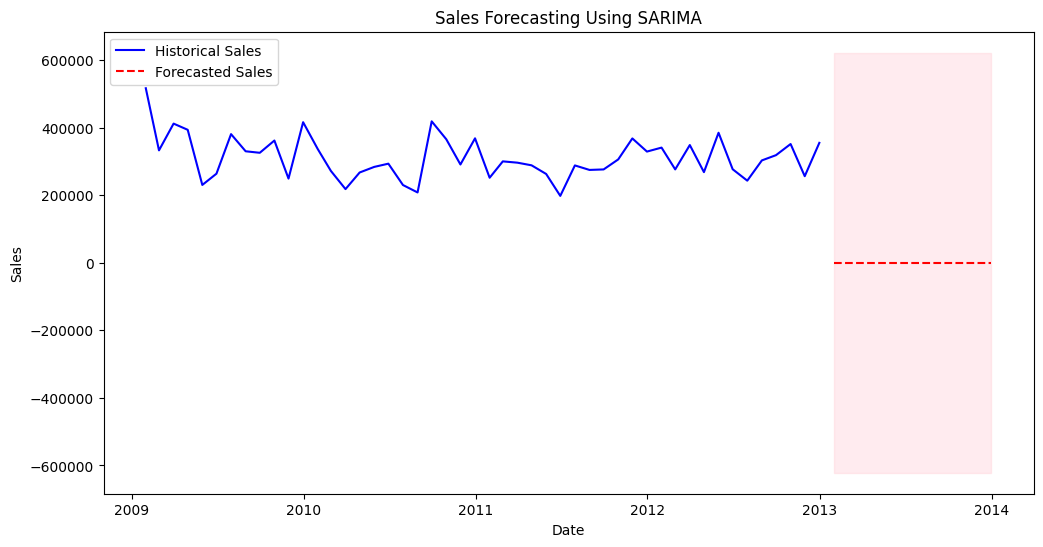

In [16]:
# Install pmdarima if not available
try:
    import pmdarima as pm
except ModuleNotFoundError:
    !pip install pmdarima --quiet
    import pmdarima as pm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# Load dataset
file_path = "/content/ORDERS.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], format='%m/%d/%y', errors='coerce')

# Aggregate sales by order date
time_series = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Set ORDERDATE as the index
time_series.set_index('ORDERDATE', inplace=True)

# Resample data to monthly frequency to smooth variations
time_series = time_series.resample('M').sum()

# Check stationarity using Augmented Dickey-Fuller (ADF) Test
adf_test = adfuller(time_series['SALES'])
print(f"ADF Test Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is non-stationary. Differencing required.")
    time_series['SALES'] = time_series['SALES'].diff().dropna()

# Auto ARIMA to determine optimal parameters
auto_model = auto_arima(time_series['SALES'].dropna(), seasonal=True, m=12, trace=True)

# Fit SARIMA model
sarima_model = SARIMAX(time_series['SALES'], order=auto_model.order, seasonal_order=auto_model.seasonal_order)
sarima_fit = sarima_model.fit()

# Forecast for next 12 months
forecast_steps = 12
future_dates = pd.date_range(start=time_series.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot historical data and forecast
plt.figure(figsize=(12,6))
plt.plot(time_series.index, time_series['SALES'], label='Historical Sales', color='blue')
plt.plot(future_dates, forecast_values, label='Forecasted Sales', color='red', linestyle='dashed')
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecasting Using SARIMA")
plt.legend()
plt.show()
